<b>Zagadnienia</b>  
* Twierdzenie o wartości średniej
* Metody iteracyjne i ich zbieżność   
Mówimy że metoda jest rzędu $p$, gdy $ \lim_{k \to \inf} \frac{|{\epsilon_{k+1}}|}{|{\epsilon_k}|^p} = c$, dla ${\epsilon_k}=x_{k+1}-x_k$.
 - gdy $p=1$ mówimy że metoda jest zbieżna liniowo.
 - gdy $p=2$ mówimy że metoda jest zbieżna kwadratowo,  
 - gdy $p>1 \land p<2$ mówimy że metoda jest zbieżna superliniowo.  

* Metoda Bisekcji
* Metoda Newtona-Raphson'a
* Metoda Siecznych

W poniższych zadaniach rozważana będzie funkcja:   
$ f(x) = \textrm{e}^{-2x} + x^2 - 1 $  

In [1]:
f = lambda x : math.e**(-2*x) + x**2 - 1
df = lambda x : 2*x - 2*math.e**(-2*x)
ddf = lambda x : 4*math.e**(-2*x)+2

***Zadanie 1***

Korzystając z pakietu matplotlib wykonaj wykresy funkcji $f$ oraz jej pierwszej i drugiej pochodnej, wszystkie trzy wykresy zamieść na jednym rysunku. Niezapomnij o podipsaniu osi i utworzeniu legendy. Na podstawie wykresów oszacuj wartości pierwiastków równania $f(x)=0$ oraz wyznacz odpowiednie przedziały dla metod bisekcji, siecznych i Newtona-Raphson'a (stycznych).

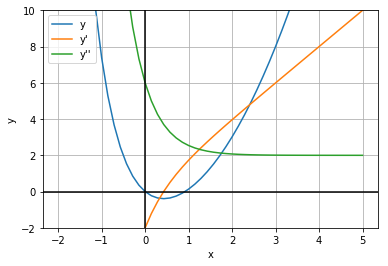

In [13]:
import math
import numpy as np
import matplotlib.pyplot as plt

x = [i for i in np.linspace(-2, 5)]
y = [f(i) for i in x]
dy = [df(i) for i in x]
ddy = [ddf(i) for i in x]

plt.ylim(-2, 10)

plt.xlabel('x')
plt.ylabel('y')

plt.plot(x, y, label="y")
plt.plot(x, dy, label="y'")
plt.plot(x, ddy, label="y''")
plt.legend()

plt.axhline(color="black")
plt.axvline(color="black")
plt.grid()

plt.show()

1. Oszacowanie: $f\left(x\right) = 0 \implies x \in \left\{ 0, \frac{9}{10} \right\}$
2. Przedziały: 
    - metoda bijekcji: $a = -1.1, b = 0.15$
    - metoda Newtona-Raphsona: $x = -1.1$
    - metoda siecznych: $x_1 = -1.1, x_2 = -0.5$

***Zadanie 2***
1. Napisz własną funkcję poszukującą miejsc zerowych metodą bisekcji. Metoda powinna przyjmować jako argumenty: funkcję, której pierwiastka poszukujemy, punkty krańcowe przedziału początkowego, zadaną dokładność i maksymalną liczbę iteracji. Poza pierwiastkiem funkcja powinna zwracać ilość wykonanych iteracji.
2. Wypisz warunki wystarczające zbieżności metody w przedziale izolacji pierwiastka.
3. Korzystając z własnej implementacji znajdź miejsce zerowe funkcji $f$ z warunkiem stopu: $|x_{k+1} - x_{k}| \leq 10^{-10}$.
4. Porównaj rezultat oraz czas działania z metodą *bisect* z pakietu [scipy](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.optimize.bisect.html). Do pomiaru czasu możesz wykorzystać pakiet [time](https://docs.python.org/3/library/time.html).

In [3]:
# Zadanie 2.1

# Returns the found root of a function between a and b, and the number of iterations it took to find it.
# Stops looking for solution when difference between roots from two consecutive iterations is smaller 
# than resolution parameter or when iterations reached maxIterations.
def findRootByBisection(f, a: float, b: float, resolution: float, maxIterations: int) -> (float, int):
    if(f(a)*f(b) >= 0):
        raise Exception('Wrong interval given, f(a) and f(b) must be of different signs.')
    if(b <= a):
        raise Exception('Wrong interval given, a should be the lower end of interval.')
    
    iteration = 1
    width = abs(b-a)
    
    while(iteration < maxIterations):
        # Get the middle of interval
        c = (a+b)/2
        
        # Check if we hit the root and for end condition.
        if(f(c) == 0 or width/4 < resolution):
            return (c, iteration)
            
        # Root in [a, c] interval
        if(f(a)*f(c) < 0):
            b = c
        # Root in [c, b] interval
        else:
            a = c
            
        iteration += 1
        width /= 2
        
    return (c, iteration)

Zadanie 2.2: 
Warunki wystarczające dla zbieżności metody bisekcji:
1. $ f\left(a\right) \cdot f\left(b\right) < 0 $ - Wartości funkcji $f$ na końcach podanego przedziału są różnych znaków
2. $ a < b $ - $a$ jest początkiem przedziału

In [4]:
# Zadanie 2.3
print('Miejsce zerowe f(x) znalezione metoda bijekcji: {}'
          .format(findRootByBisection(f, a=-1.1, b=0.15, resolution=10**-10, maxIterations=1000)[0])
)

Miejsce zerowe f(x) znalezione metoda bijekcji: 5.8207477726668354e-12


In [5]:
# Zadanie 2.4
from scipy.optimize import bisect as scipyBisect
from timeit import default_timer as timer

start = timer()
root = findRootByBisection(f, -1.1, 0.15, 10**-10, 1000)[0]
myBisectTime = timer() - start

start = timer()
rootByScypi = scipyBisect(f, -1.1, 0.15, xtol = 10**-10, maxiter=1000)
scipyBisectTime = timer() - start

print('myBisect: {:.5}ms, scypiBisect: {:.5}ms'.format(myBisectTime*1000, scipyBisectTime*1000))

myBisect: 0.10684ms, scypiBisect: 0.061285ms


***Zadanie 3***
1. Napisz własną funkcję poszukującą miejsc zerowych metodą stycznych (Newtona-Raphsona). Metoda powinna przyjmować jako argumenty: funkcję, której pierwiastka poszukujemy, jej pochodną, punkty startowy, zadaną dokładność i maksymalną liczbę iteracji. Poza pierwiastkiem funkcja powinna zwracać ilość wykonanych iteracji.
2. Wypisz warunki wystarczające zbieżności metody dla ustalonego punktu startowego.
3. Korzystając z własnej implementacji znajdź miejsce zerowe funkcji $f$ z warunkiem stopu: $|x_{k+1} - x_{k}| \leq 10^{-10}$.
4. Porównaj rezultat oraz czas działania z metodą *newton* z pakietu [scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html).

In [6]:
# Zadanie 3.1

# Returns the found root of a function given starting x, and the number of iterations it took to find it.
# Stops looking for solution when difference between roots from two consecutive iterations is smaller 
# than resolution paramter or when iterations reached maxIterations.
def findRootByNewton_Raphson(f, df, x: float, resolution: float, maxIterations: int) -> (float, int):
    iteration = 1
    while(iteration < maxIterations):
        dx = f(x)/df(x)
        
        if(abs(dx) < resolution):
            return(x, iteration)
            
        x -= dx
        iteration += 1
        
    return (x, iteration)

Zadanie 3.2 - Warunki wystarczające zbieżności metody:
1. $ f''(x) > 0, x \in \left(x_s;x_0\right) \vee x \in \left(x_0;x_s\right) $ - Druga pochodna musi być dodatnia dla $x \in \left(x_s;x_0\right)$ żeby metoda była na pewno zbieżna (funkcja musi być wypukła po drodze do miesjca zerowego).

In [7]:
# Zadanie 3.3
print('Miejsce zerowe f(x) znalezione metodoą Newtona-Raphsona: {}'
          .format(findRootByNewton_Raphson(f, df, x=-1.1, resolution=10**-10, maxIterations=1000)[0])
)

Miejsce zerowe f(x) znalezione metodoą Newtona-Raphsona: -3.1773388719784757e-16


In [8]:
# Zadanie 3.4
from scipy.optimize import newton as scipyNewtonRaphson

start = timer()
root = findRootByNewton_Raphson(f, df, -1.1, 10**-10, 1000)[0]
myNewtonRaphsonTime = timer() - start

start = timer()
rootByScypi = scipyNewtonRaphson(f, -1.1, fprime=df, tol = 10**-10, maxiter=1000)
scipyBisectTime = timer() - start

print('myBisect: {:.5}ms, scypiBisect: {:.5}ms'.format(myNewtonRaphsonTime*1000, scipyBisectTime*1000))

myBisect: 0.10971ms, scypiBisect: 0.11549ms


***Zadanie 4***
1. Napisz własną funkcję poszukującą miejsc zerowych metodą siecznych. Metoda powinna przyjmować jako argumenty: funkcję, której pierwiastka poszukujemy, punkty startowy, zadaną dokładność i maksymalną liczbę iteracji. Poza pierwiastkiem funkcja powinna zwracać ilość wykonanych iteracji.
2. Wypisz warunki wystarczające zbieżności metody dla ustalonego punktu startowego.
3. Korzystając z własnej implementacji znajdź miejsce zerowe funkcji $f$  z warunkiem stopu: $|x_{k+1} - x_{k}| \leq 10^{-10}$.
4. Porównaj rezultat oraz czas działania z metodą *newton* z pakietu [scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html).
5. Porównaj liczbę iteracji i czas obliczeń dla wszystkich przeanalizowanych powyżej metod.

In [9]:
# Zadanie 4.1

# Returns the found root of a function given two starting xs, and the number of iterations it took to find it.
# Stops looking for solution when difference between roots from two consecutive iterations is smaller 
# than resolution paramter or when iterations reached maxIterations.
def findRootBySecant(f, x1: float, x2: float, resolution: float, maxIterations: int) -> (float, int):
    iteration = 1
    while(iteration < maxIterations):
        x = (x1 * f(x2) - x2 * f(x1)) / ( f(x2) - f(x1) )
        
        if(abs(x - x2) < resolution):
            return(x, iteration)
            
        x1, x2 = x2, x
        iteration += 1
        
    return (x, iteration)

Zadanie 4.2 - Warunki wystarczające zbieżności metody: [źródło](https://en.wikipedia.org/wiki/Secant_method#Convergence)
1. Funkcja $y\left(x\right)$ musi być podwójnie różniczkowalna.
2. Szukany pierwiastek musi być o krotności równej 1.
3. Początkowe dwie wartości muszą być 'odpowienio' blisko szukanego pierwiastka.

In [10]:
# Zadanie 4.3
print('Miejsce zerowe f(x) znalezione metodoą siecznych: {}'
          .format(findRootBySecant(f, -1.1, -0.5, resolution=10**-10, maxIterations=1000)[0])
)

Miejsce zerowe f(x) znalezione metodoą siecznych: 4.773043778713835e-17


In [11]:
# Zadanie 4.4

start = timer()
root = findRootBySecant(f, -1.1, -0.5, 10**-10, 1000)[0]
mySecantTime = timer() - start

start = timer()
rootByScypi = scipyNewtonRaphson(f, -1.1, fprime=None, tol = 10**-10, maxiter=1000)
scipySecantTime = timer() - start

print('myBisect: {:.5}ms, scypiBisect: {:.5}ms'.format(mySecantTime*1000, scipySecantTime*1000))

myBisect: 0.073558ms, scypiBisect: 0.058199ms


In [12]:
start = timer()
bisectionResults = findRootByBisection(f, -1.1, 0.15, 10**-10, 1000)
bisectionTime = timer() - start

start = timer()
newtonResults = findRootByNewton_Raphson(f, df, -1.1, 10**-10, 1000)
newtonTime = timer() - start

start = timer()
secantResults = findRootBySecant(f, -1.1, -0.5, 10**-10, 1000)
secantTime = timer() - start

print('Bisection:      time: {:.5}ms, iterations: {},'.format(bisectionTime*1000, bisectionResults[1]))
print('Newton-Raphson: time: {:.5}ms, iterations: {},'.format(newtonTime*1000, newtonResults[1]))
print('Secant:         time: {:.5}ms, iterations: {}.'.format(secantTime*1000, secantResults[1]))

Bisection:      time: 0.10353ms, iterations: 33,
Newton-Raphson: time: 0.049794ms, iterations: 8,
Secant:         time: 0.066535ms, iterations: 9.


Jak widać metoda Newtona-Raphsona jest nawydajniejsza zarówno pod względem czasu wykonania jak i ilości iteracji, następna jest metoda siecznych i na końcu metoda bijekcji.

Dane te zgadzają się z rzędami zbieżności tych metod:
- Newton-Raphson: $p = 2$
- Siecznych: $p = \phi \approx 1.618$
- Bijekcji: $p = 1$